In [ ]:
from google.colab import drive
drive.flush_and_unmount()

import shutil
import os

# Path to the content directory
content_dir = '/content/'

# List the contents inside the content directory
for filename in os.listdir(content_dir):
    file_path = os.path.join(content_dir, filename)
    try:
        if os.path.isfile(file_path) or os.path.islink(file_path):
            os.unlink(file_path)  # Remove files or symlinks
        elif os.path.isdir(file_path):
            shutil.rmtree(file_path)  # Remove directories
    except Exception as e:
        print(f'Failed to delete {file_path}. Reason: {e}')

print(f"All contents inside '{content_dir}' have been deleted.")

Drive not mounted, so nothing to flush and unmount.
All contents inside '/content/' have been deleted.


In [ ]:
!nvidia-smi

Sun Mar 30 20:13:04 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off |   00000000:00:04.0 Off |                    0 |
| N/A   32C    P0             44W /  400W |       0MiB /  40960MiB |      0%      Default |
|                                         |                        |             Disabled |
+-----------------------------------------+-----

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
WEIGHTS_PATH = f"/content/working_datasets/weights"
!mkdir -p {WEIGHTS_PATH}
!wget -P {WEIGHTS_PATH} -q https://github.com/ultralytics/assets/releases/download/v8.3.0/yolo11x.pt

In [ ]:
!pip uninstall ultralytics -y
!pip install ultralytics==8.3.40

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 898.5/898.5 kB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 84.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 82.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 48.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 39.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 93.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninsta

In [ ]:
%pip install ultralytics supervision roboflow
import ultralytics
ultralytics.checks()

Ultralytics 8.3.40 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
Setup complete ✅ (12 CPUs, 83.5 GB RAM, 41.5/235.7 GB disk)


In [ ]:
from google.colab import drive
import zipfile
import os

# Mount Google Drive
drive.mount('/content/drive')

# Define HOME directory
HOME = '/content'

# Create a dedicated directory for datasets
!mkdir -p {HOME}/datasets

# Change working directory to datasets folder
%cd {HOME}/datasets

# Path to your dataset zip file in Google Drive
zip_path = "/content/drive/My Drive/Pistachios/New-Pistachios.v3i.yolov8.zip"

# Unzipping the dataset to the datasets directory
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(f'{HOME}/datasets')

# List the contents of the datasets directory to verify extraction
!ls {HOME}/datasets

# Now directly using the paths to train, valid, and test inside datasets
!ls {HOME}/datasets/train || echo "Folder does not exist. Listing contents of /content/datasets to check the structure:"


Mounted at /content/drive
/content/datasets
data.yaml  README.roboflow.txt	test  train  valid
images	labels


In [ ]:
import os

# Define HOME directory (assumed to be '/content')
HOME = '/content'

splits = ['train', 'valid', 'test']

# Overall totals
overall_bg_annotations = 0
overall_pistachio_annotations = 0
overall_total_annotations = 0
overall_total_images = 0

for split in splits:
    # Directories for each split
    annotations_dir = os.path.join(HOME, 'datasets', split, 'labels')
    images_dir = os.path.join(HOME, 'datasets', split, 'images')

    # Counters for this split
    bg_count = 0          # Count for background (class_id=0)
    pistachio_count = 0   # Count for pistachio (class_id=1)
    total_annotations = 0
    image_count = 0

    # Count annotations in each label file
    if os.path.exists(annotations_dir):
        for file_name in os.listdir(annotations_dir):
            if file_name.endswith('.txt'):
                file_path = os.path.join(annotations_dir, file_name)
                with open(file_path, 'r') as file:
                    lines = file.readlines()
                    for line in lines:
                        line = line.strip()
                        if not line:
                            continue
                        parts = line.split()
                        class_id = int(parts[0])
                        total_annotations += 1
                        if class_id == 0:
                            bg_count += 1
                        elif class_id == 1:
                            pistachio_count += 1

    # Count images in the images directory
    if os.path.exists(images_dir):
        for file_name in os.listdir(images_dir):
            if file_name.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.tiff')):
                image_count += 1

    # Update overall totals
    overall_bg_annotations += bg_count
    overall_pistachio_annotations += pistachio_count
    overall_total_annotations += total_annotations
    overall_total_images += image_count

    # Print split summary
    print(f"{split.upper()} set:")
    print(f"  Images: {image_count}")
    print(f"  Total Annotations: {total_annotations}")
    print(f"    - Background (class_id=0): {bg_count}")
    print(f"    - Pistachios (class_id=1): {pistachio_count}")
    print("")

# Print overall summary
print("==== OVERALL TOTALS ====")
print(f"Total Images: {overall_total_images}")
print(f"Total Annotations: {overall_total_annotations}")
print(f"  - Background (class_id=0): {overall_bg_annotations}")
print(f"  - Pistachios (class_id=1): {overall_pistachio_annotations}")

TRAIN set:
  Images: 500
  Total Annotations: 18765
    - Background (class_id=0): 500
    - Pistachios (class_id=1): 18265

VALID set:
  Images: 30
  Total Annotations: 1220
    - Background (class_id=0): 30
    - Pistachios (class_id=1): 1190

TEST set:
  Images: 15
  Total Annotations: 571
    - Background (class_id=0): 15
    - Pistachios (class_id=1): 556

==== OVERALL TOTALS ====
Total Images: 545
Total Annotations: 20556
  - Background (class_id=0): 545
  - Pistachios (class_id=1): 20011


In [ ]:
import os
import shutil
import random
import uuid
from PIL import Image

# ===================== CONFIGURATION ======================
HOME = '/content'

# Paths to the original dataset splits (each with "images/" and "labels/" subfolders)
original_dataset_dir = os.path.join(HOME, 'datasets')
splits = ['train', 'valid', 'test']

# Directory to unify all images and labels before processing
unified_dir = os.path.join(HOME, 'unified_dataset')
unified_img_dir = os.path.join(unified_dir, 'images')
unified_lbl_dir = os.path.join(unified_dir, 'labels')
os.makedirs(unified_img_dir, exist_ok=True)
os.makedirs(unified_lbl_dir, exist_ok=True)

# YOLO class IDs in your dataset (before remapping)
BACKGROUND_CLASS_ID = 0     # original background
PISTACHIO_CLASS_ID  = 1     # original pistachio

# Final single-class YOLO config: after background removal, only one class (pistachios) remains.
train_ratio = 0.8
val_ratio   = 0.1
test_ratio  = 0.1

# Directories for final train/valid/test splits
base_dir = os.path.join(HOME, 'working_datasets')
train_img_dir = os.path.join(base_dir, 'train', 'images')
train_lbl_dir = os.path.join(base_dir, 'train', 'labels')
val_img_dir   = os.path.join(base_dir, 'valid', 'images')
val_lbl_dir   = os.path.join(base_dir, 'valid', 'labels')
test_img_dir  = os.path.join(base_dir, 'test', 'images')
test_lbl_dir  = os.path.join(base_dir, 'test', 'labels')

for d in [train_img_dir, train_lbl_dir, val_img_dir, val_lbl_dir, test_img_dir, test_lbl_dir]:
    os.makedirs(d, exist_ok=True)

# ===================== STEP 1: UNIFY ALL IMAGES =====================
print("Combining all splits (train/valid/test) into one 'unified_dataset' folder...")

for split in splits:
    split_img_dir = os.path.join(original_dataset_dir, split, 'images')
    split_lbl_dir = os.path.join(original_dataset_dir, split, 'labels')
    if not os.path.isdir(split_img_dir):
        print(f"Warning: {split_img_dir} not found; skipping split '{split}'")
        continue

    for img_file in os.listdir(split_img_dir):
        if not img_file.lower().endswith(('.jpg', '.jpeg', '.png')):
            continue
        src_img_path = os.path.join(split_img_dir, img_file)
        # Use the full base name (do not strip off anything)
        base_name = os.path.splitext(img_file)[0]
        lbl_file = base_name + '.txt'
        src_lbl_path = os.path.join(split_lbl_dir, lbl_file) if os.path.isfile(os.path.join(split_lbl_dir, lbl_file)) else None

        # Copy image into unified folder
        dst_img_path = os.path.join(unified_img_dir, img_file)
        shutil.copy2(src_img_path, dst_img_path)

        # Copy corresponding label file if it exists
        if src_lbl_path and os.path.isfile(src_lbl_path):
            dst_lbl_path = os.path.join(unified_lbl_dir, lbl_file)
            shutil.copy2(src_lbl_path, dst_lbl_path)

print("All splits have been merged into:", unified_dir)
print("")

# ===================== STEP 2: BACKGROUND REMOVAL =====================
def read_yolo_annotation(file_path):
    """Reads YOLO-format annotations (bounding boxes or polygons)."""
    annotations = []
    if not os.path.exists(file_path):
        return annotations
    with open(file_path, 'r') as f:
        for line in f:
            line = line.strip()
            if not line:
                continue
            parts = line.split()
            class_id = int(parts[0])
            coords = list(map(float, parts[1:]))
            if len(coords) == 4:
                x_c, y_c, w, h = coords
                annotations.append((class_id, x_c, y_c, w, h))
            else:
                if len(coords) < 6 or len(coords) % 2 != 0:
                    print(f"Skipping malformed polygon line in {file_path}: '{line}'")
                    continue
                xs = coords[0::2]
                ys = coords[1::2]
                x_min, x_max = min(xs), max(xs)
                y_min, y_max = min(ys), max(ys)
                x_c = (x_min + x_max) / 2.0
                y_c = (y_min + y_max) / 2.0
                w   = x_max - x_min
                h   = y_max - y_min
                annotations.append((class_id, x_c, y_c, w, h))
    return annotations

def save_yolo_annotation(file_path, annotations):
    """Writes YOLO-format annotations to a file."""
    with open(file_path, 'w') as f:
        for ann in annotations:
            class_id, x_c, y_c, w, h = ann
            f.write(f"{class_id} {x_c:.6f} {y_c:.6f} {w:.6f} {h:.6f}\n")

all_images = [img for img in os.listdir(unified_img_dir) if img.lower().endswith(('.jpg', '.jpeg', '.png'))]

num_bg_crops_created = 0
num_images_with_pistachio = 0
num_negative_images = 0

print("Removing 'background' bounding boxes (class_id=0) and cropping them into new negative images...")

for img_name in all_images:
    label_path = os.path.join(unified_lbl_dir, os.path.splitext(img_name)[0] + '.txt')
    if not os.path.exists(label_path):
        num_negative_images += 1
        continue
    annotations = read_yolo_annotation(label_path)
    if not annotations:
        num_negative_images += 1
        continue
    image_path = os.path.join(unified_img_dir, img_name)
    img = Image.open(image_path).convert('RGB')
    img_w, img_h = img.size
    updated_annotations = []
    for i, ann in enumerate(annotations):
        class_id, x_c, y_c, w, h = ann
        if class_id == BACKGROUND_CLASS_ID:
            x_center = x_c * img_w
            y_center = y_c * img_h
            bbox_w   = w * img_w
            bbox_h   = h * img_h
            x_min = int(x_center - bbox_w / 2)
            x_max = int(x_center + bbox_w / 2)
            y_min = int(y_center - bbox_h / 2)
            y_max = int(y_center + bbox_h / 2)
            cropped = img.crop((x_min, y_min, x_max, y_max))
            base_name = os.path.splitext(img_name)[0]
            unique_id = uuid.uuid4().hex
            crop_img_name = f"{base_name}_bg_{i}_{unique_id}.jpg"
            crop_img_path = os.path.join(unified_img_dir, crop_img_name)
            cropped.save(crop_img_path)
            crop_label_path = os.path.join(unified_lbl_dir, os.path.splitext(crop_img_name)[0] + '.txt')
            open(crop_label_path, 'w').close()
            num_bg_crops_created += 1
        else:
            new_class_id = 0
            updated_annotations.append((new_class_id, x_c, y_c, w, h))
    save_yolo_annotation(label_path, updated_annotations)
    if len(updated_annotations) == 0:
        num_negative_images += 1
    else:
        num_images_with_pistachio += 1

print("Background removal completed!")
print(f"  Number of new negative crop images: {num_bg_crops_created}")
print(f"  Images with at least one pistachio: {num_images_with_pistachio}")
print(f"  Pure negative images (no bboxes):   {num_negative_images}")
print("")

# ===================== STEP 3: STRATIFIED SPLIT =====================
all_images = [img for img in os.listdir(unified_img_dir) if img.lower().endswith(('.jpg', '.jpeg', '.png'))]

positive_images = []
negative_images = []

def has_annotations(label_path):
    if not os.path.isfile(label_path):
        return False
    ann = read_yolo_annotation(label_path)
    return (len(ann) > 0)

for img_name in all_images:
    label_name = os.path.splitext(img_name)[0] + '.txt'
    label_path = os.path.join(unified_lbl_dir, label_name)
    if has_annotations(label_path):
        positive_images.append(img_name)
    else:
        negative_images.append(img_name)

def split_counts(total):
    t = int(total * train_ratio)
    v = int(total * val_ratio)
    s = total - t - v
    return t, v, s

random.shuffle(positive_images)
random.shuffle(negative_images)

pos_train_count, pos_val_count, pos_test_count = split_counts(len(positive_images))
neg_train_count, neg_val_count, neg_test_count = split_counts(len(negative_images))

pos_train = positive_images[:pos_train_count]
pos_val   = positive_images[pos_train_count: pos_train_count + pos_val_count]
pos_test  = positive_images[pos_train_count + pos_val_count:]
neg_train = negative_images[:neg_train_count]
neg_val   = negative_images[neg_train_count: neg_train_count + neg_val_count]
neg_test  = negative_images[neg_train_count + neg_val_count:]

train_images = pos_train + neg_train
val_images   = pos_val + neg_val
test_images  = pos_test + neg_test

random.shuffle(train_images)
random.shuffle(val_images)
random.shuffle(test_images)

print("=== Stratified Split Results ===")
print(f"  Train: {len(train_images)} total = {len(pos_train)} positive + {len(neg_train)} negative")
print(f"  Valid: {len(val_images)} total  = {len(pos_val)} positive + {len(neg_val)} negative")
print(f"  Test:  {len(test_images)} total = {len(pos_test)} positive + {len(neg_test)} negative")
print("")

# ===================== STEP 4: MOVE FINAL SPLITS =====================
def move_files(image_list, img_dest_dir, lbl_dest_dir):
    for img_file in image_list:
        src_img_path = os.path.join(unified_img_dir, img_file)
        if not os.path.exists(src_img_path):
            print(f"Warning: {src_img_path} not found, skipping.")
            continue
        base_name = os.path.splitext(img_file)[0]  # Use the full base name (unchanged)
        lbl_file = base_name + '.txt'
        src_lbl_path = os.path.join(unified_lbl_dir, lbl_file)
        dst_img_path = os.path.join(img_dest_dir, img_file)
        dst_lbl_path = os.path.join(lbl_dest_dir, lbl_file)
        if os.path.exists(dst_img_path):
            os.remove(dst_img_path)
        shutil.move(src_img_path, dst_img_path)
        if os.path.exists(dst_lbl_path):
            os.remove(dst_lbl_path)
        if os.path.exists(src_lbl_path):
            shutil.move(src_lbl_path, dst_lbl_path)
        else:
            with open(dst_lbl_path, 'w') as f:
                f.write('')

print("Moving files to final train/valid/test directories...")
move_files(train_images, train_img_dir, train_lbl_dir)
move_files(val_images,   val_img_dir,   val_lbl_dir)
move_files(test_images,  test_img_dir,  test_lbl_dir)

print("Final dataset splits created in:", base_dir)
print("")
print("===== SUMMARY =====")
print(f"Train: {len(os.listdir(train_img_dir))} images -> {train_img_dir}")
print(f"Valid: {len(os.listdir(val_img_dir))} images -> {val_img_dir}")
print(f"Test:  {len(os.listdir(test_img_dir))} images -> {test_img_dir}")
print("")
print("Data config (data.yaml) example:")
print("nc: 1")
print("names: ['pistachios']")
print("train: ../train/images")
print("val:   ../valid/images")
print("test:  ../test/images")
print("")
print("Done! You now have a single-class dataset with no background bounding boxes,")
print("cropped negative samples, and an 80/10/10 stratified split stored in /content/working_datasets.")

Combining all splits (train/valid/test) into one 'unified_dataset' folder...
All splits have been merged into: /content/unified_dataset

Removing 'background' bounding boxes (class_id=0) and cropping them into new negative images...
Background removal completed!
  Number of new negative crop images: 545
  Images with at least one pistachio: 545
  Pure negative images (no bboxes):   0

=== Stratified Split Results ===
  Train: 872 total = 436 positive + 436 negative
  Valid: 108 total  = 54 positive + 54 negative
  Test:  110 total = 55 positive + 55 negative

Moving files to final train/valid/test directories...
Final dataset splits created in: /content/working_datasets

===== SUMMARY =====
Train: 872 images -> /content/working_datasets/train/images
Valid: 108 images -> /content/working_datasets/valid/images
Test:  110 images -> /content/working_datasets/test/images

Data config (data.yaml) example:
nc: 1
names: ['pistachios']
train: ../train/images
val:   ../valid/images
test:  ../tes

In [ ]:
import os

# Path to your datasets directory and desired data.yaml file
base_dir = '/content/working_datasets'
data_yaml_path = os.path.join(base_dir, 'data.yaml')

# Write out the updated data.yaml
with open(data_yaml_path, 'w') as f:
    f.write("train: ../train/images\n")
    f.write("val: ../valid/images\n")
    f.write("test: ../test/images\n\n")  # Make sure the 'test' split is defined!
    f.write("nc: 1\n")  # Single class
    f.write("names: ['Pistachios']\n\n")

    # (Optional) Roboflow metadata block; remove if not needed
    f.write("roboflow:\n")
    f.write("  workspace: pistachios-knen1\n")
    f.write("  project: new-pistachios-zoodo\n")
    f.write("  version: 2\n")
    f.write("  license: Private\n")
    f.write("  url: https://app.roboflow.com/pistachios-knen1/new-pistachios-zoodo/2\n")

print("data.yaml updated with single-class configuration.")


data.yaml updated with single-class configuration.


# Training

In [ ]:
from ultralytics import YOLO
import os

# 2. If yolov11x.pt is indeed in /content/weights, proceed:
model_path = f"{WEIGHTS_PATH}/yolo11x.pt"
assert os.path.exists(model_path), f"{model_path} not found!"

model = YOLO(model_path)  # Load YOLOv11 model

# 3. Train with the desired hyperparameters:
train_results = model.train(
    data="/content/working_datasets/data.yaml",
    epochs=100,
    imgsz=800,
    batch=16,
    device="cuda",
    plots=True,
    conf=0.25,  # Confidence threshold
    iou=0.70    # IoU threshold
)


New https://pypi.org/project/ultralytics/8.3.99 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.40 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: task=detect, mode=train, model=/content/working_datasets/weights/yolo11x.pt, data=/content/working_datasets/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=0.25, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None,

100%|██████████| 755k/755k [00:00<00:00, 14.9MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1      2784  ultralytics.nn.modules.conv.Conv             [3, 96, 3, 2]                 
  1                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  2                  -1  2    389760  ultralytics.nn.modules.block.C3k2            [192, 384, 2, True, 0.25]     
  3                  -1  1   1327872  ultralytics.nn.modules.conv.Conv             [384, 384, 3, 2]              
  4                  -1  2   1553664  ultralytics.nn.modules.block.C3k2            [384, 768, 2, True, 0.25]     
  5                  -1  1   5309952  ultralytics.nn.modules.conv.Conv             [768, 768, 3, 2]              
  6                  -1  2   5022720  ultralytics.nn.modules.block.C3k2            [768, 768, 2, True]           
  7                  -1  1   5309952  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 67.1MB/s]


AMP: checks passed ✅


train: Scanning /content/working_datasets/train/labels... 872 images, 436 backgrounds, 0 corrupt: 100%|██████████| 872/872 [00:00<00:00, 1699.40it/s]

train: New cache created: /content/working_datasets/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.11/dist-packages/ultralytics/data/augment.py:1850: UserWarning: Argument(s) 'quality_lower' are not valid for transform ImageCompression
  A.ImageCompression(quality_lower=75, p=0.0),
val: Scanning /content/working_datasets/valid/labels... 108 images, 54 backgrounds, 0 corrupt: 100%|██████████| 108/108 [00:00<00:00, 1397.73it/s]

val: New cache created: /content/working_datasets/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 167 weight(decay=0.0), 174 weight(decay=0.0005), 173 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 800 train, 800 val
Using 8 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      26.6G      1.695      1.826      1.031        232        800: 100%|██████████| 55/55 [00:23<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.16it/s]

                   all        108       1976    0.00066    0.00253   0.000335   5.36e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      26.1G      1.687      1.266      1.015        279        800: 100%|██████████| 55/55 [00:21<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.55it/s]

                   all        108       1976    0.00066    0.00253   0.000335   5.36e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      25.9G      1.683      1.216      1.018        375        800: 100%|██████████| 55/55 [00:21<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.27it/s]

                   all        108       1976      0.361     0.0374       0.07     0.0351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      26.1G      1.691      1.144      1.025        252        800: 100%|██████████| 55/55 [00:21<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.50it/s]

                   all        108       1976      0.361     0.0374       0.07     0.0351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      25.9G      1.658        1.1      1.014        235        800: 100%|██████████| 55/55 [00:21<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.54it/s]

                   all        108       1976       0.44    0.00253      0.078     0.0327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      26.2G      1.619      1.063      0.997        139        800: 100%|██████████| 55/55 [00:21<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.59it/s]

                   all        108       1976      0.716      0.721      0.769      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      25.9G      1.537      1.037     0.9721         90        800: 100%|██████████| 55/55 [00:21<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.78it/s]

                   all        108       1976      0.726       0.68       0.75      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      25.7G      1.546      0.984     0.9771        195        800: 100%|██████████| 55/55 [00:21<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.90it/s]

                   all        108       1976       0.77      0.668      0.757      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      27.1G      1.526     0.9663     0.9652        156        800: 100%|██████████| 55/55 [00:21<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.63it/s]

                   all        108       1976      0.393      0.589      0.321      0.177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100        26G      1.496     0.9772      0.967        255        800: 100%|██████████| 55/55 [00:21<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.14it/s]

                   all        108       1976      0.722      0.342      0.501      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100        26G      1.474     0.9265     0.9626         85        800: 100%|██████████| 55/55 [00:21<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.74it/s]

                   all        108       1976      0.794      0.748      0.822       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      26.1G      1.453     0.9095     0.9538        183        800: 100%|██████████| 55/55 [00:21<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.80it/s]

                   all        108       1976       0.82      0.745      0.834      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      25.8G      1.465     0.8931     0.9455        106        800: 100%|██████████| 55/55 [00:21<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.72it/s]

                   all        108       1976      0.792      0.789      0.847      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      25.5G      1.415     0.8559     0.9381        336        800: 100%|██████████| 55/55 [00:20<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.70it/s]

                   all        108       1976      0.783      0.777       0.84      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100        26G       1.42     0.8398     0.9355        348        800: 100%|██████████| 55/55 [00:21<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.82it/s]

                   all        108       1976      0.814      0.814      0.878      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100        26G      1.406     0.8332     0.9312        207        800: 100%|██████████| 55/55 [00:21<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.88it/s]

                   all        108       1976      0.808      0.748      0.833      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      25.9G      1.408     0.8441     0.9323        277        800: 100%|██████████| 55/55 [00:21<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.77it/s]

                   all        108       1976      0.821      0.848      0.899      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      25.9G      1.401     0.8578     0.9266        323        800: 100%|██████████| 55/55 [00:20<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.84it/s]

                   all        108       1976      0.849        0.8      0.868      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      26.2G      1.367      0.783     0.9189        142        800: 100%|██████████| 55/55 [00:21<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.79it/s]

                   all        108       1976       0.82      0.829      0.891      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      25.5G      1.347     0.7795     0.9238        134        800: 100%|██████████| 55/55 [00:21<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.80it/s]

                   all        108       1976       0.83      0.773      0.856      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      25.9G      1.326     0.7589     0.9086         50        800: 100%|██████████| 55/55 [00:21<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.84it/s]

                   all        108       1976      0.811      0.801       0.85      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      26.2G      1.322      0.793     0.9168        197        800: 100%|██████████| 55/55 [00:20<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.72it/s]

                   all        108       1976      0.811      0.826      0.879      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      25.8G      1.332      0.782     0.9205        216        800: 100%|██████████| 55/55 [00:20<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.83it/s]

                   all        108       1976      0.836      0.796      0.864      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      26.3G      1.313     0.7533     0.9136        226        800: 100%|██████████| 55/55 [00:21<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.70it/s]

                   all        108       1976      0.804      0.845      0.891      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      25.7G      1.313      0.749     0.9114        180        800: 100%|██████████| 55/55 [00:21<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.83it/s]

                   all        108       1976      0.838      0.832      0.895      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100        26G      1.319     0.7398     0.9076         90        800: 100%|██████████| 55/55 [00:21<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.80it/s]

                   all        108       1976       0.81      0.852      0.898      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100        26G      1.273     0.7368     0.9034        307        800: 100%|██████████| 55/55 [00:20<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.70it/s]

                   all        108       1976      0.817      0.847        0.9      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100        26G      1.266     0.7144     0.9067        189        800: 100%|██████████| 55/55 [00:21<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.80it/s]

                   all        108       1976      0.825      0.807      0.877      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      25.8G      1.278      0.711     0.9053        277        800: 100%|██████████| 55/55 [00:21<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.73it/s]

                   all        108       1976      0.834      0.866      0.912      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100        26G      1.288      0.744     0.9115        219        800: 100%|██████████| 55/55 [00:21<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.89it/s]

                   all        108       1976      0.849       0.85      0.885      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      26.1G      1.252     0.7006      0.907        329        800: 100%|██████████| 55/55 [00:21<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.79it/s]

                   all        108       1976       0.85      0.844      0.909      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100        26G      1.259     0.7232     0.8973        107        800: 100%|██████████| 55/55 [00:21<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.73it/s]

                   all        108       1976      0.812      0.846      0.892      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      25.9G      1.256     0.7023     0.9004        167        800: 100%|██████████| 55/55 [00:21<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.85it/s]

                   all        108       1976       0.85      0.804      0.883      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      26.1G      1.241     0.7034     0.8948        286        800: 100%|██████████| 55/55 [00:20<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.79it/s]

                   all        108       1976      0.825      0.727      0.808      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      26.3G      1.239     0.6692     0.8979        103        800: 100%|██████████| 55/55 [00:20<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.86it/s]

                   all        108       1976      0.855      0.845      0.894       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      25.4G      1.218     0.6778     0.8966        101        800: 100%|██████████| 55/55 [00:21<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.83it/s]

                   all        108       1976      0.839      0.846      0.902      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      25.8G      1.231     0.6842     0.8947        171        800: 100%|██████████| 55/55 [00:20<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.86it/s]

                   all        108       1976      0.854      0.855      0.918      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      26.2G      1.215     0.6881      0.891        153        800: 100%|██████████| 55/55 [00:21<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.85it/s]

                   all        108       1976      0.858      0.845      0.905        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      26.1G      1.233     0.6868     0.8846        251        800: 100%|██████████| 55/55 [00:21<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.82it/s]

                   all        108       1976      0.857      0.875      0.924      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100        26G      1.202     0.6584      0.888        321        800: 100%|██████████| 55/55 [00:21<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.83it/s]

                   all        108       1976      0.859      0.847      0.911      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      25.9G       1.18     0.6424     0.8843        176        800: 100%|██████████| 55/55 [00:20<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.83it/s]

                   all        108       1976      0.849      0.859      0.907      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      26.8G      1.219     0.6633     0.8832        225        800: 100%|██████████| 55/55 [00:21<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.84it/s]

                   all        108       1976      0.859      0.867      0.914      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      25.9G      1.216     0.6511     0.8863        180        800: 100%|██████████| 55/55 [00:21<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.80it/s]

                   all        108       1976      0.868      0.865       0.92      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      26.2G      1.169     0.6424     0.8819        258        800: 100%|██████████| 55/55 [00:21<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.82it/s]

                   all        108       1976      0.862      0.868      0.932      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100        26G      1.171     0.6347     0.8784        288        800: 100%|██████████| 55/55 [00:21<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.82it/s]

                   all        108       1976      0.857      0.875      0.926      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      26.1G      1.162     0.6364      0.883        172        800: 100%|██████████| 55/55 [00:20<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.76it/s]

                   all        108       1976       0.87      0.838      0.915       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      26.1G       1.16     0.6258      0.876        100        800: 100%|██████████| 55/55 [00:21<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.82it/s]

                   all        108       1976       0.87      0.888      0.938      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100        26G      1.124     0.6056     0.8748        145        800: 100%|██████████| 55/55 [00:21<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.84it/s]

                   all        108       1976      0.862       0.86      0.921      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      25.9G      1.132     0.6208     0.8782        340        800: 100%|██████████| 55/55 [00:20<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.86it/s]

                   all        108       1976      0.846      0.876      0.905      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      26.1G      1.116     0.5943     0.8675        183        800: 100%|██████████| 55/55 [00:20<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.73it/s]

                   all        108       1976      0.862      0.891      0.927      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      26.2G      1.122     0.5927     0.8689         85        800: 100%|██████████| 55/55 [00:21<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.86it/s]

                   all        108       1976      0.853      0.889      0.927      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      26.1G      1.106     0.6027     0.8664        123        800: 100%|██████████| 55/55 [00:21<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.81it/s]

                   all        108       1976      0.874      0.874      0.931      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      25.8G      1.113     0.6114     0.8806        182        800: 100%|██████████| 55/55 [00:20<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.66it/s]

                   all        108       1976      0.878      0.866      0.933      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      25.9G      1.083     0.5771     0.8671        124        800: 100%|██████████| 55/55 [00:20<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.81it/s]

                   all        108       1976       0.87      0.852      0.915      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      26.1G      1.089     0.5916     0.8578        219        800: 100%|██████████| 55/55 [00:20<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.86it/s]

                   all        108       1976      0.873      0.887      0.935      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      26.1G      1.082     0.5785     0.8582        194        800: 100%|██████████| 55/55 [00:21<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.79it/s]

                   all        108       1976      0.884        0.9      0.953      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      25.8G      1.085     0.5664     0.8644        307        800: 100%|██████████| 55/55 [00:21<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.82it/s]

                   all        108       1976      0.882      0.895      0.942      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100        27G      1.073     0.5717      0.864        124        800: 100%|██████████| 55/55 [00:21<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.79it/s]

                   all        108       1976      0.886      0.903      0.946      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100        26G      1.086     0.5788     0.8632         61        800: 100%|██████████| 55/55 [00:20<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.83it/s]

                   all        108       1976      0.899      0.869      0.939      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      26.2G      1.081     0.5805     0.8625        260        800: 100%|██████████| 55/55 [00:20<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.78it/s]

                   all        108       1976      0.904       0.87      0.917      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100        26G      1.033     0.5501     0.8558        224        800: 100%|██████████| 55/55 [00:20<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.78it/s]

                   all        108       1976      0.899      0.889      0.949      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100        26G      1.071     0.5711     0.8682        154        800: 100%|██████████| 55/55 [00:21<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.87it/s]

                   all        108       1976      0.898      0.888      0.947      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      26.2G      1.049     0.5573     0.8532         75        800: 100%|██████████| 55/55 [00:21<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.84it/s]

                   all        108       1976      0.889      0.901      0.947       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100        26G      1.032     0.5483     0.8598        241        800: 100%|██████████| 55/55 [00:21<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.84it/s]

                   all        108       1976      0.902      0.876      0.929      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100        26G      1.034     0.5436     0.8543        289        800: 100%|██████████| 55/55 [00:21<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.67it/s]

                   all        108       1976      0.879      0.894      0.945      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      26.2G      1.037     0.5564     0.8492        268        800: 100%|██████████| 55/55 [00:20<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.74it/s]

                   all        108       1976      0.913      0.889      0.945      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      26.1G      1.033     0.5311     0.8532        434        800: 100%|██████████| 55/55 [00:20<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.84it/s]

                   all        108       1976      0.908      0.894       0.95      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      26.3G      1.015     0.5373     0.8512        226        800: 100%|██████████| 55/55 [00:20<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.79it/s]

                   all        108       1976       0.87        0.9      0.935      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      26.1G     0.9734     0.5133     0.8457        137        800: 100%|██████████| 55/55 [00:20<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.86it/s]

                   all        108       1976      0.878      0.914      0.949      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100        27G     0.9852     0.5139     0.8428        317        800: 100%|██████████| 55/55 [00:21<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.79it/s]

                   all        108       1976      0.888      0.907      0.952      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      26.1G     0.9887     0.5206       0.85        222        800: 100%|██████████| 55/55 [00:20<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.83it/s]

                   all        108       1976      0.876      0.898      0.943      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      25.9G     0.9976     0.5217     0.8457        377        800: 100%|██████████| 55/55 [00:21<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.85it/s]

                   all        108       1976      0.912      0.909      0.953      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      25.8G     0.9687     0.5119     0.8468        473        800: 100%|██████████| 55/55 [00:20<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.87it/s]

                   all        108       1976      0.896      0.909      0.951      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      25.8G          1     0.5215     0.8456        170        800: 100%|██████████| 55/55 [00:20<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.89it/s]

                   all        108       1976      0.892      0.909      0.956      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      26.1G     0.9412     0.4868     0.8435        176        800: 100%|██████████| 55/55 [00:20<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.83it/s]

                   all        108       1976       0.91       0.91      0.962      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      25.9G     0.9408     0.4976      0.838        151        800: 100%|██████████| 55/55 [00:20<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.87it/s]

                   all        108       1976      0.896       0.92      0.958      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      26.2G     0.9399     0.4905     0.8411        128        800: 100%|██████████| 55/55 [00:20<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.88it/s]

                   all        108       1976      0.908      0.921      0.957        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      25.9G     0.9381     0.4858     0.8371         87        800: 100%|██████████| 55/55 [00:20<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.85it/s]

                   all        108       1976      0.885      0.925      0.955      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100        26G     0.9226      0.481     0.8353        269        800: 100%|██████████| 55/55 [00:21<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.76it/s]

                   all        108       1976      0.916      0.921      0.965      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      26.1G     0.9036     0.4711     0.8309        234        800: 100%|██████████| 55/55 [00:21<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.84it/s]

                   all        108       1976      0.906      0.926      0.966      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      25.9G     0.9127     0.4797     0.8387        159        800: 100%|██████████| 55/55 [00:20<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.77it/s]

                   all        108       1976      0.913      0.919      0.964      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      26.1G     0.9289      0.491     0.8355        144        800: 100%|██████████| 55/55 [00:20<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.73it/s]

                   all        108       1976      0.905      0.929      0.967      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      25.9G     0.9062     0.4673     0.8334         97        800: 100%|██████████| 55/55 [00:20<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.80it/s]

                   all        108       1976      0.901      0.943      0.966      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100        26G     0.8995      0.464     0.8327        138        800: 100%|██████████| 55/55 [00:21<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.84it/s]

                   all        108       1976      0.913      0.912      0.961      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      25.9G     0.8926     0.4613     0.8326        195        800: 100%|██████████| 55/55 [00:20<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.79it/s]

                   all        108       1976      0.918      0.903      0.958      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      26.9G     0.8681     0.4507     0.8286        486        800: 100%|██████████| 55/55 [00:20<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.86it/s]

                   all        108       1976      0.917      0.908      0.962      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      25.9G     0.8643     0.4498     0.8311        115        800: 100%|██████████| 55/55 [00:20<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.86it/s]

                   all        108       1976      0.918      0.912      0.962      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      26.1G     0.8734      0.459     0.8289        323        800: 100%|██████████| 55/55 [00:20<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.86it/s]

                   all        108       1976      0.921      0.923      0.966      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      25.9G     0.8628     0.4461     0.8317        230        800: 100%|██████████| 55/55 [00:20<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.86it/s]

                   all        108       1976      0.927      0.912      0.967      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      25.2G     0.8533     0.4495     0.8268        125        800: 100%|██████████| 55/55 [00:20<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.87it/s]

                   all        108       1976      0.934      0.922      0.969      0.735


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.11/dist-packages/ultralytics/data/augment.py:1850: UserWarning: Argument(s) 'quality_lower' are not valid for transform ImageCompression
  A.ImageCompression(quality_lower=75, p=0.0),



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      25.9G     0.8928     0.4679     0.8404         63        800: 100%|██████████| 55/55 [00:21<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.82it/s]

                   all        108       1976      0.925      0.901      0.958      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100        26G     0.8471      0.445     0.8324        144        800: 100%|██████████| 55/55 [00:20<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.83it/s]

                   all        108       1976      0.913      0.906      0.957      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      25.5G     0.8476      0.438     0.8283        162        800: 100%|██████████| 55/55 [00:20<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.83it/s]

                   all        108       1976      0.932      0.904      0.964       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      26.1G     0.8235      0.425     0.8277        114        800: 100%|██████████| 55/55 [00:20<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.84it/s]

                   all        108       1976      0.924      0.915      0.964       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100        26G     0.8265      0.429      0.828        170        800: 100%|██████████| 55/55 [00:20<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.75it/s]

                   all        108       1976      0.937      0.907      0.965      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      26.1G     0.8268     0.4284     0.8329         71        800: 100%|██████████| 55/55 [00:20<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.85it/s]

                   all        108       1976      0.923      0.922      0.968      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      25.9G     0.7946     0.4112     0.8236         90        800: 100%|██████████| 55/55 [00:20<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.84it/s]

                   all        108       1976      0.932      0.917      0.967      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      25.9G     0.7861     0.4146     0.8244         67        800: 100%|██████████| 55/55 [00:20<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.86it/s]

                   all        108       1976      0.925      0.924      0.966      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      26.1G     0.7911     0.4147     0.8246         97        800: 100%|██████████| 55/55 [00:20<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.81it/s]

                   all        108       1976      0.916      0.928      0.968      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      25.9G     0.7947     0.4137     0.8235         98        800: 100%|██████████| 55/55 [00:20<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.83it/s]

                   all        108       1976      0.931       0.93      0.971      0.746



100 epochs completed in 0.670 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 114.4MB
Optimizer stripped from runs/detect/train/weights/best.pt, 114.4MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.40 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
YOLO11x summary (fused): 464 layers, 56,828,179 parameters, 0 gradients, 194.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.29it/s]


                   all        108       1976      0.931       0.93      0.971      0.746
Speed: 0.2ms preprocess, 5.3ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs/detect/train


/content


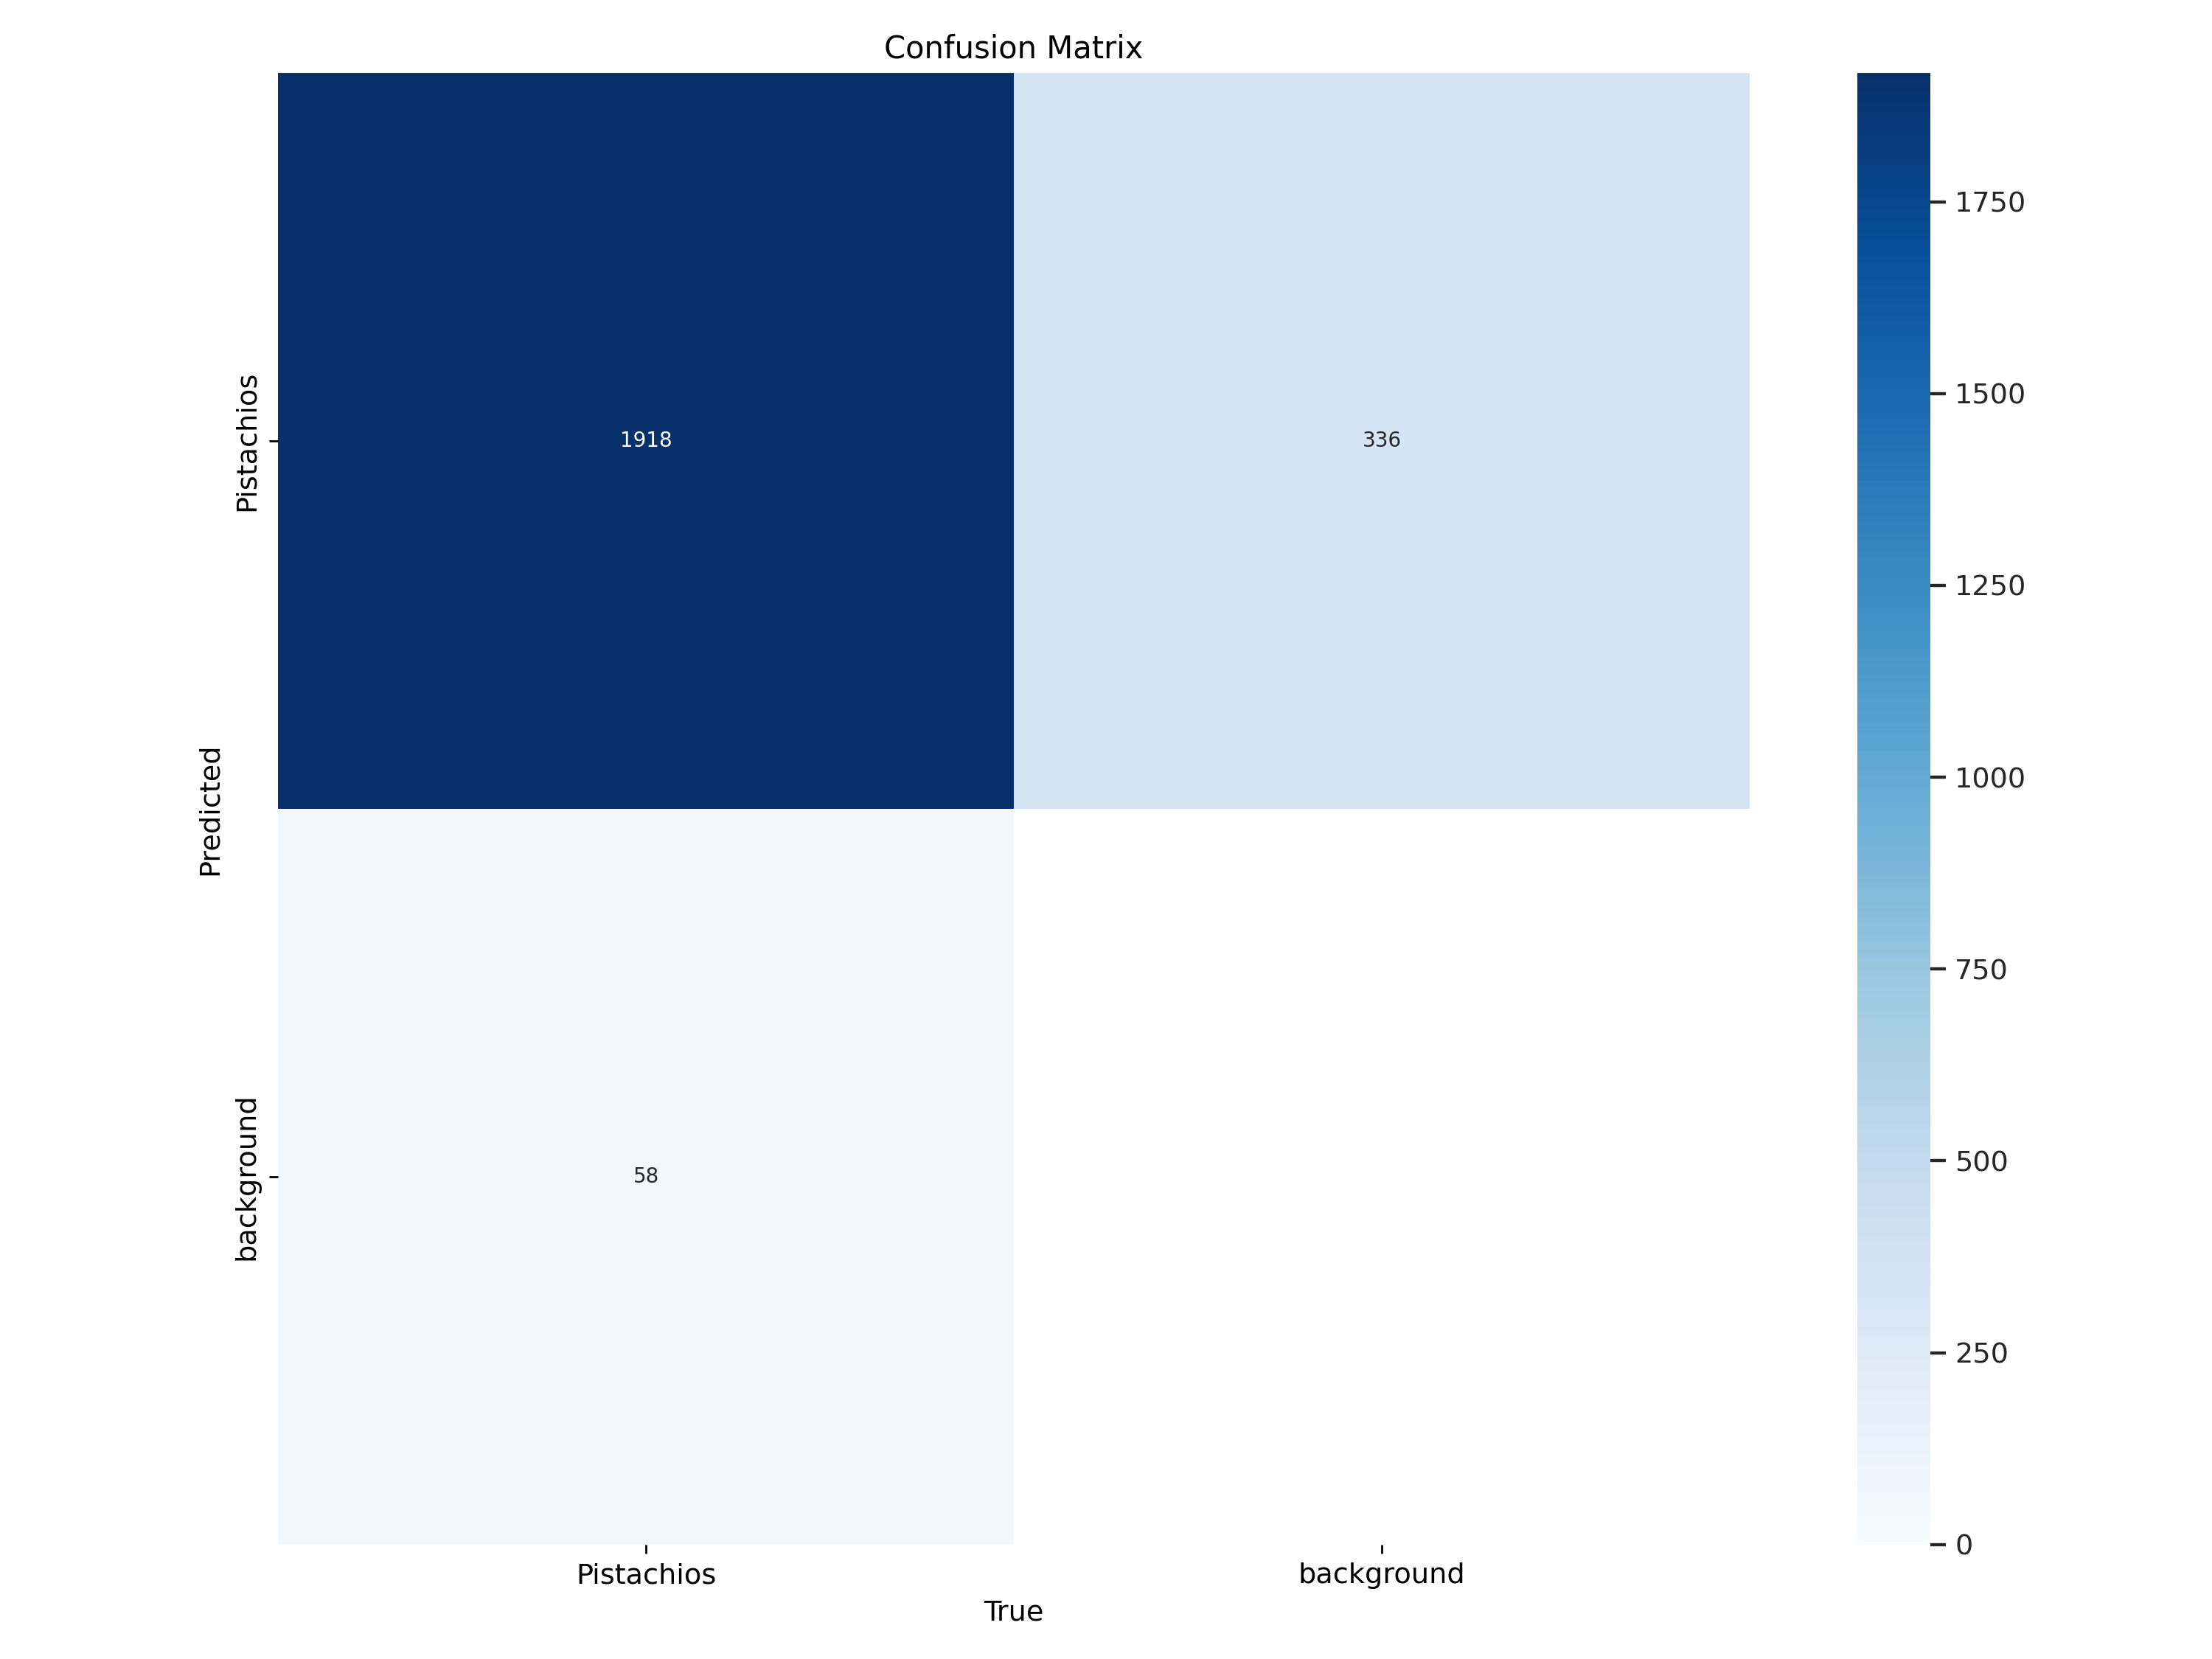

In [ ]:
%cd {HOME}
from IPython.display import Image
Image(filename=f'{HOME}/datasets/runs/detect/train/confusion_matrix.png', width=600)

In [ ]:
# Load the trained YOLO model
model = YOLO(f'{HOME}/datasets/runs/detect/train/weights/best.pt')
metrics = model.val(save_txt=True, split="test")
print(metrics.results_dict)

Ultralytics 8.3.40 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
YOLO11x summary (fused): 464 layers, 56,828,179 parameters, 0 gradients, 194.4 GFLOPs


val: Scanning /content/working_datasets/test/labels... 110 images, 55 backgrounds, 0 corrupt: 100%|██████████| 110/110 [00:00<00:00, 1693.90it/s]

val: New cache created: /content/working_datasets/test/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:08<00:00,  1.28s/it]


                   all        110       2264      0.924      0.924      0.974      0.746
Speed: 0.2ms preprocess, 13.1ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/detect/val
{'metrics/precision(B)': np.float64(0.9238409010472732), 'metrics/recall(B)': np.float64(0.9235865724381626), 'metrics/mAP50(B)': np.float64(0.9744069299813471), 'metrics/mAP50-95(B)': np.float64(0.7457180746194895), 'fitness': np.float64(0.7685869601556753)}


/content


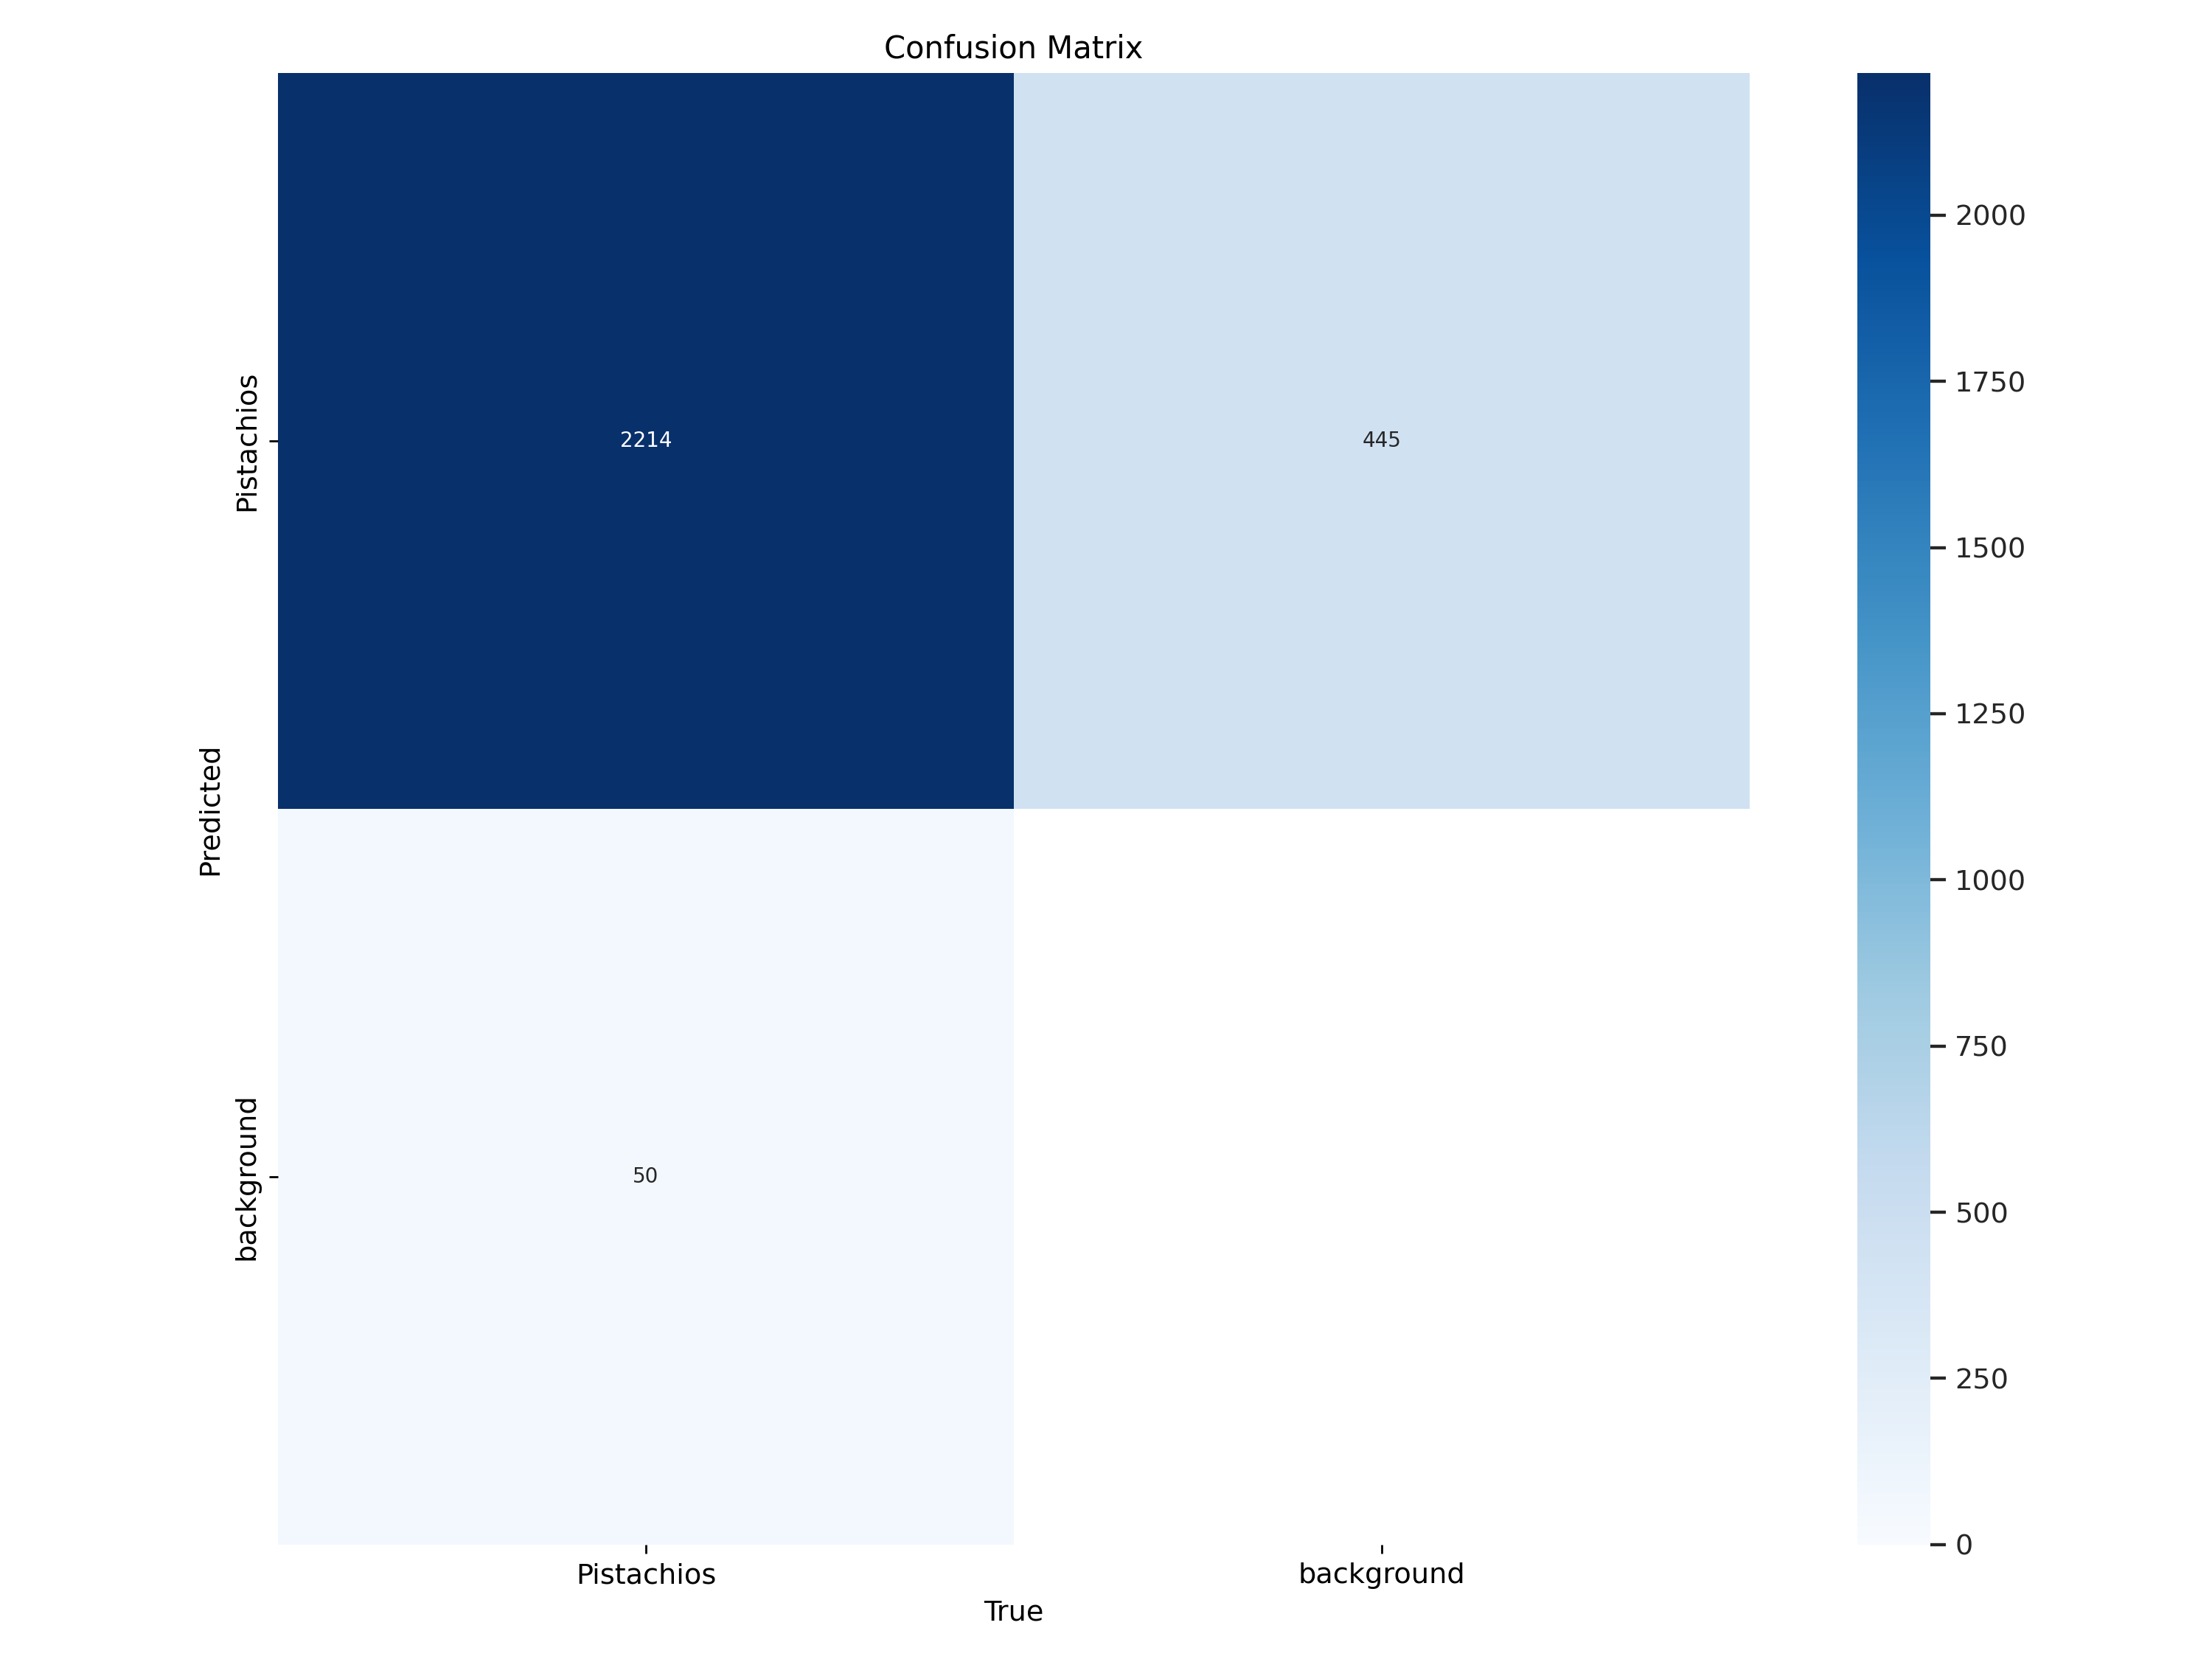

In [ ]:
%cd {HOME}
from IPython.display import Image
Image(filename=f'{HOME}/runs/detect/val/confusion_matrix.png', width=600)

/content


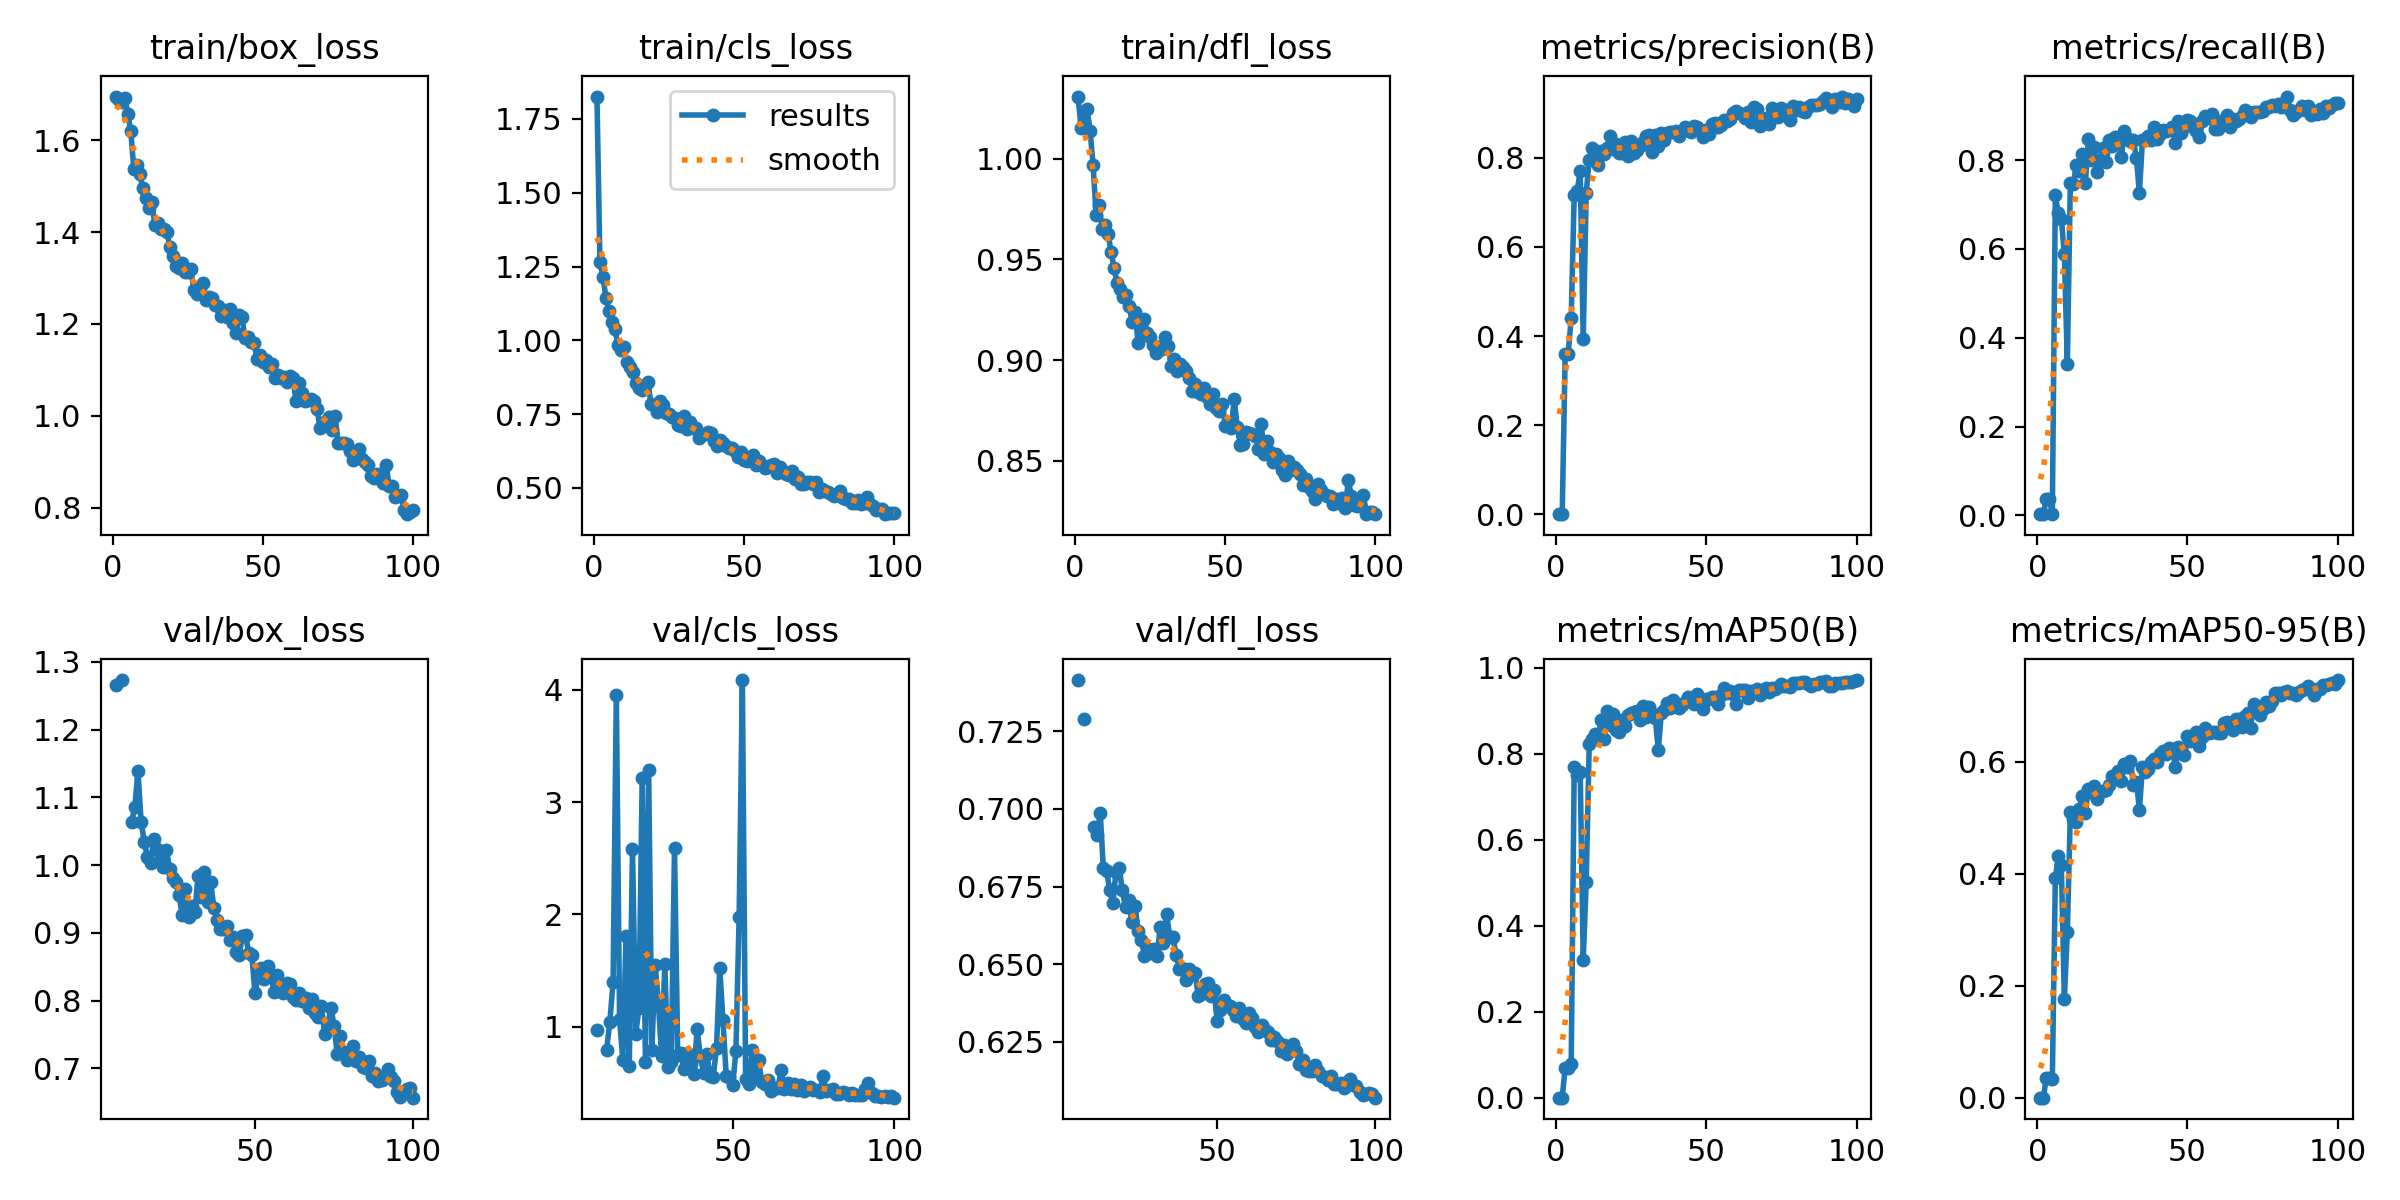

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/datasets/runs/detect/train/results.png', width=600)

Available columns: Index(['epoch', 'time', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss',
       'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)',
       'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss',
       'lr/pg0', 'lr/pg1', 'lr/pg2'],
      dtype='object')


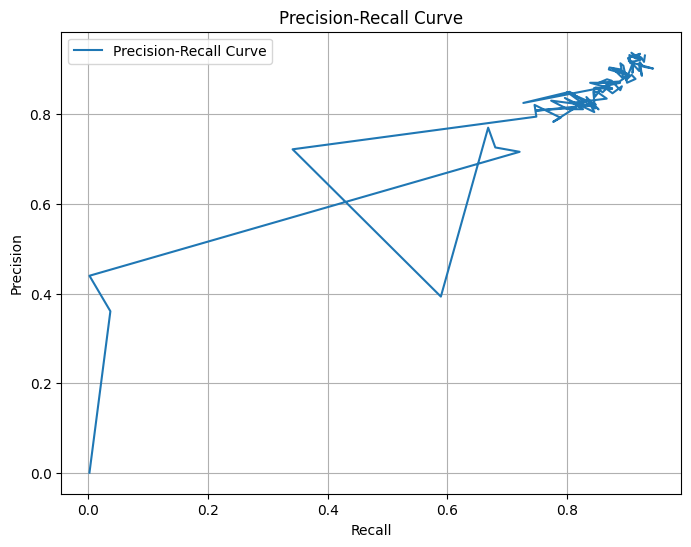

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the results CSV file
results_csv_path = '/content/datasets/runs/detect/train/results.csv'  # Update the path if necessary

# Check if the file exists before loading
try:
    results_df = pd.read_csv(results_csv_path)
except FileNotFoundError:
    print(f"Results CSV not found at: {results_csv_path}")
    raise

# Strip leading/trailing whitespace from column names
results_df.columns = results_df.columns.str.strip()

# Check column names to ensure we have the correct columns
print("Available columns:", results_df.columns)

# Access precision and recall values using the cleaned column names
try:
    precision_values = results_df['metrics/precision(B)']  # Correct column name
    recall_values = results_df['metrics/recall(B)']        # Correct column name
except KeyError as e:
    print(f"Column not found: {e}")
    print("Available columns are:", results_df.columns)
    raise

# Plot the Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall_values, precision_values, label="Precision-Recall Curve")
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import cv2
import supervision as sv
from ultralytics import YOLO

# Ensure you have the right paths
HOME = '/content'
dataset_location = f'{HOME}/datasets'

# Load the trained YOLO model
model = YOLO(f'{HOME}/datasets/runs/detect/train/weights/best.pt')

# Load the dataset using Supervision's dataset handler
dataset = sv.DetectionDataset.from_yolo(
    images_directory_path=f"{dataset_location}/valid/images",
    annotations_directory_path=f"{dataset_location}/valid/labels",
    data_yaml_path=f"{dataset_location}/data.yaml"
)

# Set up the annotators for bounding boxes and labels
bounding_box_annotator = sv.BoundingBoxAnnotator()
label_annotator = sv.LabelAnnotator()


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


SupervisionWarnings: images is deprecated: `DetectionDataset.images` property is deprecated and will be removed in `supervision-0.26.0`. Iterate with `for path, image, annotation in dataset:` instead.
SupervisionWarnings: images is deprecated: `DetectionDataset.images` property is deprecated and will be removed in `supervision-0.26.0`. Iterate with `for path, image, annotation in dataset:` instead.



0: 800x736 58 Pistachioss, 70.6ms
Speed: 5.8ms preprocess, 70.6ms inference, 2.0ms postprocess per image at shape (1, 3, 800, 736)


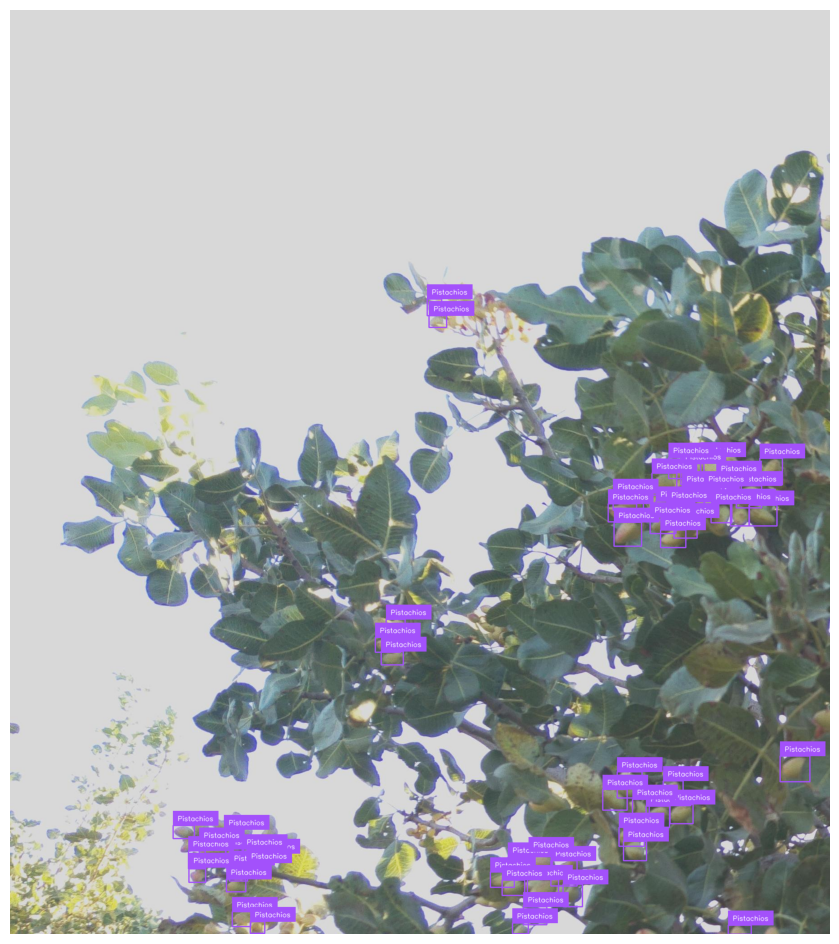

In [ ]:
import random

random_image = random.choice(list(dataset.images.keys()))
random_image = dataset.images[random_image]

results = model(source=random_image, conf=0.25)[0]
detections = sv.Detections.from_ultralytics(results)

annotated_image = bounding_box_annotator.annotate(
    scene=random_image, detections=detections)
annotated_image = label_annotator.annotate(
    scene=annotated_image, detections=detections)

sv.plot_image(annotated_image)

In [ ]:
import pandas as pd

# Path to your results CSV
results_csv = '/content/datasets/runs/detect/train/results.csv'

# Load the results CSV
results_df = pd.read_csv(results_csv)

# Print original columns
print("Original Columns:", results_df.columns)

# Strip whitespace from column names
results_df.columns = results_df.columns.str.strip()

# Print stripped columns
print("Stripped Columns:", results_df.columns)

# Extract metrics using the stripped column names
precision = results_df['metrics/precision(B)'].iloc[-1]
recall = results_df['metrics/recall(B)'].iloc[-1]
map_50 = results_df['metrics/mAP50(B)'].iloc[-1]
map_50_95 = results_df['metrics/mAP50-95(B)'].iloc[-1]

# Print the values
print(f"Final Precision: {precision}")
print(f"Final Recall: {recall}")
print(f"Final mAP@50: {map_50}")
print(f"Final mAP@50-95: {map_50_95}")


Original Columns: Index(['epoch', 'time', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss',
       'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)',
       'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss',
       'lr/pg0', 'lr/pg1', 'lr/pg2'],
      dtype='object')
Stripped Columns: Index(['epoch', 'time', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss',
       'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)',
       'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss',
       'lr/pg0', 'lr/pg1', 'lr/pg2'],
      dtype='object')
Final Precision: 0.93057
Final Recall: 0.92966
Final mAP@50: 0.97133
Final mAP@50-95: 0.74565


In [ ]:
# Saving the best model to Google Drive
import shutil

# Path to your best model
best_model_path = '/content/datasets/runs/detect/train/weights/best.pt'
data_yaml_path = '/content/working_datasets/data.yaml'

# Destination path on Google Drive
drive_save_path = '/content/drive/My Drive/Pistachios/YOLOv11_best_model_negative_samples.pt'
drive_yaml_path = '/content/drive/My Drive/Pistachios/YOLOv11_data_negative_samples.yaml'


# Copying the best model to Google Drive
shutil.copy(best_model_path, drive_save_path)

print(f"Best model saved to: {drive_save_path}")

shutil.copy(data_yaml_path, drive_yaml_path)

print(f"data.yaml saved to: {drive_yaml_path}")

Best model saved to: /content/drive/My Drive/Pistachios/YOLOv11_best_model_negative_samples.pt
data.yaml saved to: /content/drive/My Drive/Pistachios/YOLOv11_data_negative_samples.yaml
